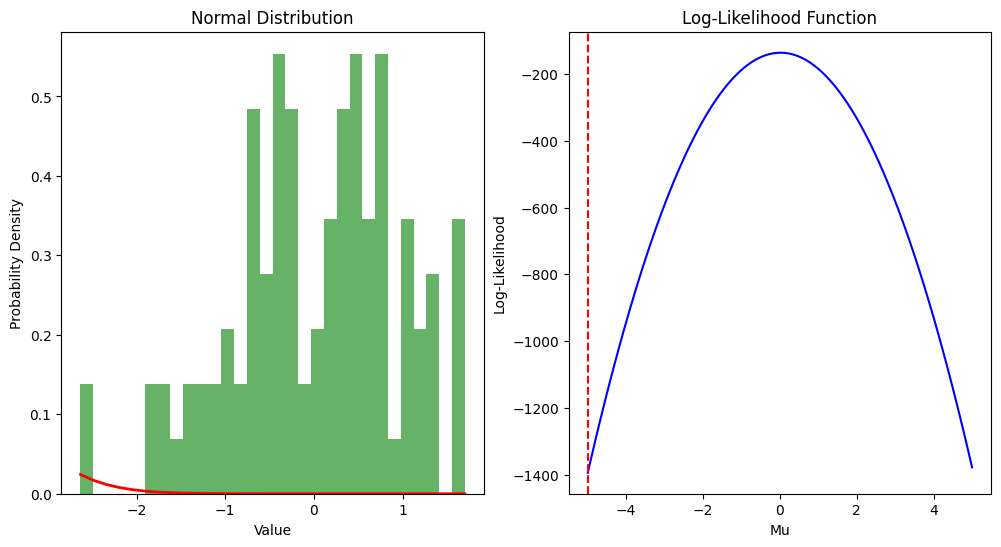

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Number of points
n_points = 100

# Generate points from a normal distribution with a fixed standard deviation
sigma = 1
points = np.random.normal(0, sigma, n_points)  # Initial points with mu = 0

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for the distribution
count, bins, ignored = ax1.hist(points, 30, density=True, alpha=0.6, color='g')

# Range of mu values for the animation
mu_values = np.linspace(-5, 5, 100)

# Function to update the plot
def update(frame):
    mu = mu_values[frame]

    # Update distribution plot
    ax1.clear()
    ax1.hist(points, 30, density=True, alpha=0.6, color='g')
    ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='r')
    ax1.set_title('Normal Distribution')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density')

    # Update likelihood plot
    ax2.clear()
    likelihoods = np.array([np.sum(-np.log(np.sqrt(2 * np.pi * sigma**2)) - ((points - m)**2 / (2 * sigma**2))) for m in mu_values])
    ax2.plot(mu_values, likelihoods, color='b')
    ax2.axvline(x=mu, color='r', linestyle='--')
    ax2.set_title('Log-Likelihood Function')
    ax2.set_xlabel('Mu')
    ax2.set_ylabel('Log-Likelihood')

# Creating the animation
ani = animation.FuncAnimation(fig, update, frames=len(mu_values), repeat=True)

# Display the animation
HTML(ani.to_html5_video())


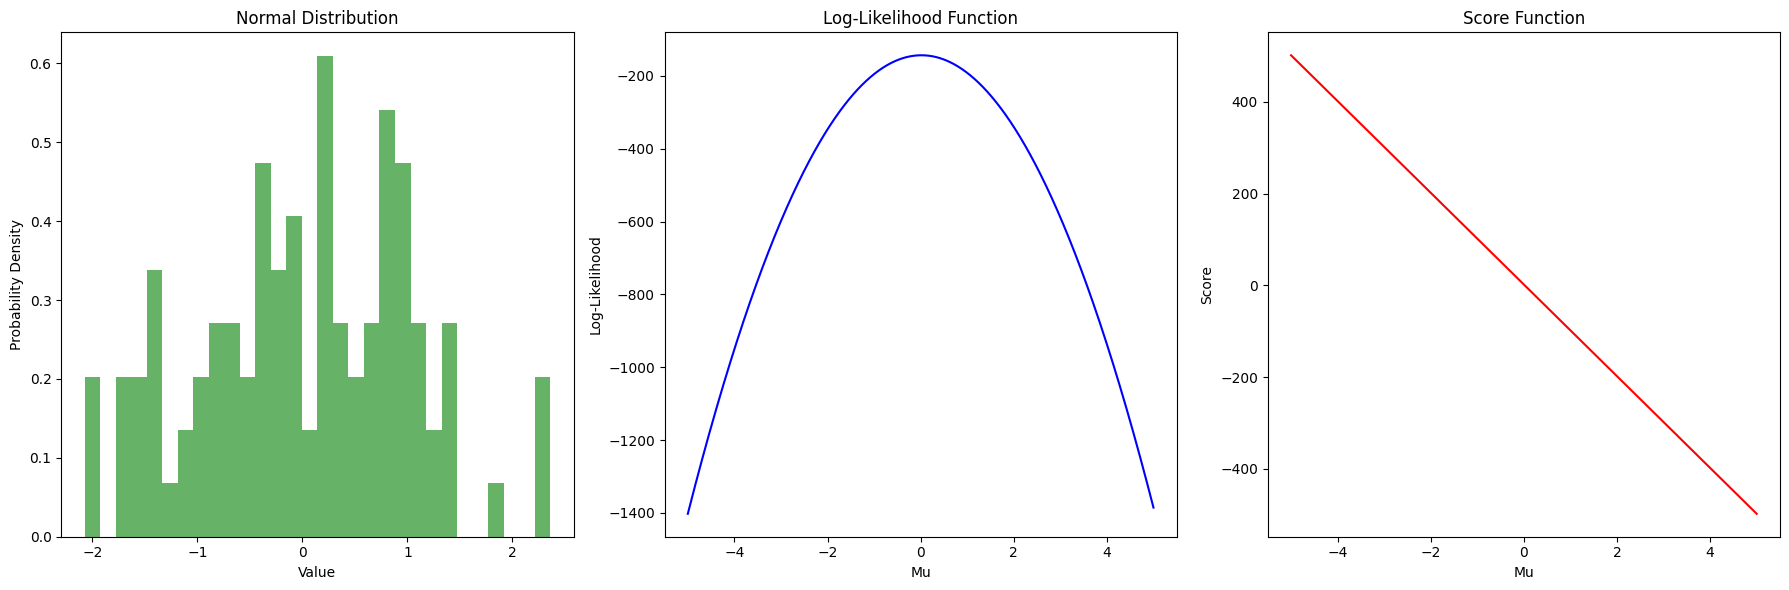

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points and fixed standard deviation
n_points = 100
sigma = 1

# Generate points from a normal distribution
points = np.random.normal(0, sigma, n_points)

# Range of mu values for plotting
mu_values = np.linspace(-5, 5, 1000)

# Normal Distribution Plot
plt.figure(figsize=(18, 6))

# 1. Normal Distribution
plt.subplot(1, 3, 1)
plt.hist(points, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# 2. Log-Likelihood Function
log_likelihoods = [np.sum(-np.log(np.sqrt(2 * np.pi * sigma**2)) - ((points - mu)**2 / (2 * sigma**2))) for mu in mu_values]
plt.subplot(1, 3, 2)
plt.plot(mu_values, log_likelihoods, color='b')
plt.title('Log-Likelihood Function')
plt.xlabel('Mu')
plt.ylabel('Log-Likelihood')

# 3. Score Function
scores = [np.sum((points - mu) / sigma**2) for mu in mu_values]
plt.subplot(1, 3, 3)
plt.plot(mu_values, scores, color='r')
plt.title('Score Function')
plt.xlabel('Mu')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def fisher_matrix(x, w, d, sigma):
    Iww = 0
    Idd = 0
    Iwd = 0

    for i in range(len(x)):

        omega = 0
        delta = x[i]


        def do(O, x):
            numerator1 = (np.pi * O**3) * np.sin(np.pi * np.sqrt(O**2 + x**2))
            denominator1 = 2 * (O**2 + x**2)**(3/2)

            numerator2 = (x**2 * O) * (np.cos(np.pi * np.sqrt(O**2 + x**2)) - 1)
            denominator2 = (O**2 + x**2)**2

            return (numerator1 / denominator1) - (numerator2 / denominator2)

        def dd(O, x):
            sqrt_term = np.sqrt(x**2 + O**2)
            sin_half = np.sin((np.pi * sqrt_term) / 2)
            cos_half = np.cos((np.pi * sqrt_term) / 2)

            numerator1 = (np.pi * O**2 * x * cos_half * sin_half)
            denominator1 = (x**2 + O**2)**(3/2)

            numerator2 = (2 * O**2 * x * sin_half**2)
            denominator2 = (x**2 + O**2)**2

            return (numerator1 / denominator1) - (numerator2 / denominator2)

        dZ_dw = do(w, delta)
        dZ_dd = dd(w, delta)

        # Compute Fisher Information Matrix elements
        Iww += (1 / sigma**2) * dZ_dw**2
        Idd += (1 / sigma**2) * dZ_dd**2
        Iwd += (1 / sigma**2) * dZ_dw * dZ_dd

    return np.array([[Iww, Iwd], [Iwd, Idd]])

def lower_bound(f_mat):
    inv = np.linalg.inv(f_mat)
    inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    d_var = np.sqrt(inv[1, 1])

    return w_var, d_var


In [97]:
import numpy as np

# Define grid points
T1 = np.linspace(-1*np.pi, 1*np.pi, 300)
T2 = np.linspace(-1*np.pi, 1*np.pi, 300)

# Define parameters
w = 0.95

d = 0  # Using `d` instead of `a` for consistency
sigma = 0.1  # Define noise level (adjust as needed)

# Initialize bound array
bound = np.zeros((300, 300))

for i in range(300):
    for j in range(300):
        t = [T1[i], T2[j]]
        try:
            # Compute Fisher matrices
            fishers = fisher_matrix(t,w, d, sigma)

            # Sum over Fisher matrices and invert
            # fisher_sum = np.sum(fishers, axis=0)
            bound_w, bound_d = lower_bound(fishers)

            # Store the total bound
            bound[i, j] = bound_w + bound_d
        except np.linalg.LinAlgError:
            bound[i, j] = np.nan  # Handle singular matrix issues

# Compute the minimum bound value (excluding NaNs)
min_val = np.nanmin(bound)
min_idx = np.unravel_index(np.nanargmin(bound), bound.shape)

print("Delta_1, Delta_2", T1[min_idx[0]], T2[min_idx[1]])

C:\Users\user\AppData\Local\Temp\ipykernel_12512\2260913610.py:49: RuntimeWarning: invalid value encountered in sqrt
  w_var = np.sqrt(inv[0, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_12512\2260913610.py:50: RuntimeWarning: invalid value encountered in sqrt
  d_var = np.sqrt(inv[1, 1])


Delta_1, Delta_2 -0.2416609733530608 0.26267497103593573


C:\Users\user\AppData\Local\Temp\ipykernel_12512\1718447949.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


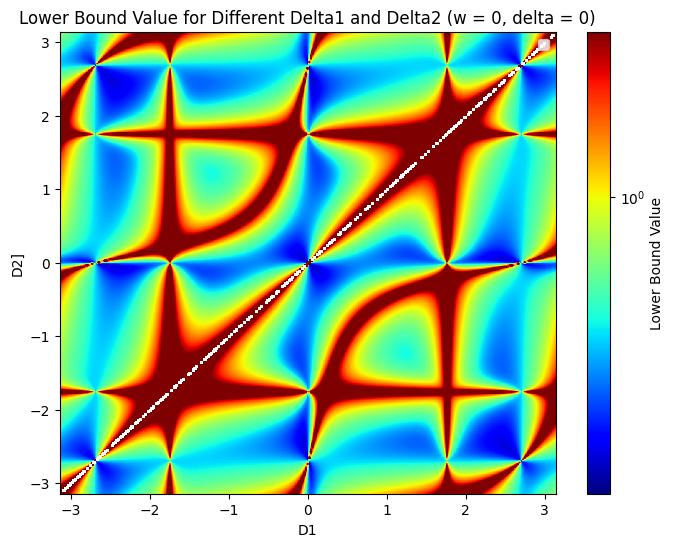

In [92]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

# Assume `bound` is already calculated as shown in the code snippet
# Here’s how to plot it as a heatmap
def piecewise_transform(value):
    if value <= 1:
        return value  # Linear for small values
    else:
        return np.log10(value) + 1  # Logarithmic for larger values

# Apply the transformation to your data
transformed_bound = np.vectorize(piecewise_transform)(bound)


plt.figure(figsize=(8, 6))
plt.imshow(bound, extent=[-1*np.pi, 1*np.pi, -1*np.pi, 1*np.pi], origin='lower', aspect='auto', cmap='jet', norm=SymLogNorm(linthresh=0.5, vmin=0.25, vmax=3))
plt.colorbar(label='Lower Bound Value')

# norm=LogNorm(vmin=0.1, vmax=10))
# Draw the vertical and horizontal lines
# plt.axvline(x=optimal_times[0], color='black', linestyle='--', linewidth=1)
# plt.axhline(y=optimal_times[1], color='black', linestyle='--', linewidth=1)

# Label axes and title
plt.xlabel('D1')
plt.ylabel('D2]')
plt.title(f'Lower Bound Value for Different Delta1 and Delta2 (w = 0, delta = {d})')

# Add a legend
plt.legend()

plt.show()



In [89]:
import numpy as np

# Define grid points
T1 = np.linspace(0, 1*np.pi, 300)

# Define parameters
w = 0.9
W = np.linspace(0.7,1.3, 300)
d = 0  # Using `d` instead of `a` for consistency
sigma = 0.1  # Define noise level (adjust as needed)

# Initialize bound array
bound = np.zeros((300))

for i in range(300):
        t = [T1[i], -T1[i]]
        try:
            # Compute Fisher matrices
            fishers = fisher_matrix(t,w, d, sigma)

            # Sum over Fisher matrices and invert
            # fisher_sum = np.sum(fishers, axis=0)
            bound_w, bound_d = lower_bound(fishers)

            # Store the total bound
            bound[i] = bound_w
        except np.linalg.LinAlgError:
            bound[i] = np.nan  # Handle singular matrix issues

# Compute the minimum bound value (excluding NaNs)
min_val = np.nanmin(bound)
min_idx = np.unravel_index(np.nanargmin(bound), bound.shape)

# print("Delta_1, Delta_2", T1[min_idx[0]], T2[min_idx[1]])

C:\Users\user\AppData\Local\Temp\ipykernel_12512\63575365.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1)


(0.09236259863910216, 1)

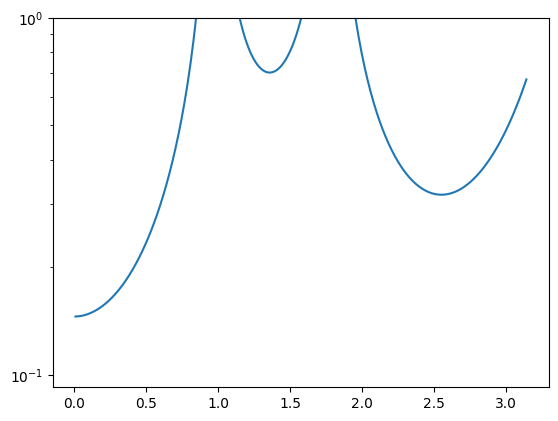

In [90]:
plt.plot(T1, bound)
plt.yscale('log')
plt.ylim(0,1)

In [109]:
import numpy as np

# Define grid points
T1 = np.linspace(0, 1*np.pi, 300)

# Define parameters
W = np.linspace(0.7,1.3, 300)
d = 0  # Using `d` instead of `a` for consistency
sigma = 0.1  # Define noise level (adjust as needed)

# Initialize bound array
bound = np.zeros((300))

for i in range(300):
        t = [1.2,-1.2]
        try:
            # Compute Fisher matrices
            fishers = fisher_matrix(t,W[i], d, sigma)

            # Sum over Fisher matrices and invert
            # fisher_sum = np.sum(fishers, axis=0)
            bound_w, bound_d = lower_bound(fishers)

            # Store the total bound
            bound[i] = bound_w + bound_d
        except np.linalg.LinAlgError:
            bound[i] = np.nan  # Handle singular matrix issues

# Compute the minimum bound value (excluding NaNs)
min_val = np.nanmin(bound)
min_idx = np.unravel_index(np.nanargmin(bound), bound.shape)

# print("Delta_1, Delta_2", T1[min_idx[0]], T2[min_idx[1]])

Text(0, 0.5, 'Lower Bound')

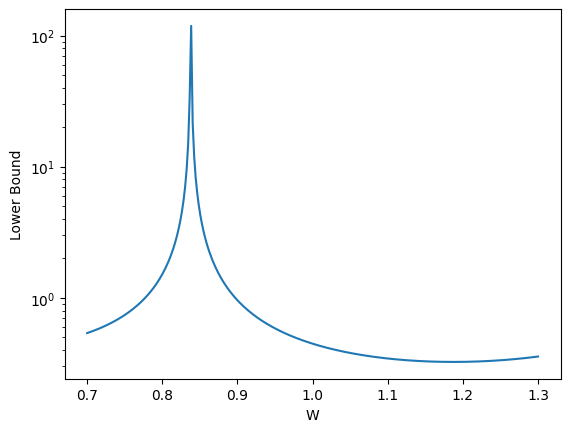

In [110]:
plt.plot(W, bound)
plt.yscale('log')
plt.xlabel('W')
plt.ylabel('Lower Bound')